# Checking RIVM data dor corralations

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.stats
from scipy.stats import chisquare
import seaborn as sns

In [2]:
%run ./data/data.ipynb

Pulling data from sources.json:
(Source: CBS)  deceased @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=70895ned&_theme=76
(Source: CBS)  population @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=37230ned&_theme=76
(Source: RIVM) counts_per_municipality @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427
(Source: RIVM) prevalence @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/097155aa-75eb-4caa-8ed3-4c6edb80467e
(Source: RIVM) r @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/ed0699d1-c9d5-4436-8517-27eb993eab6e
(Source: RIVM) homes_for_elderly @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/0179dd26-7bf6-4021-857f-8623aaf8e73a
(Source: RIVM) homes_for_disabled @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/aa28b74d-7150-47bc-a7cb-98876e93381b
(Source: RIVM) seventy_plus_living_at_home @ https://data.riv

In [3]:
rivm_per_day.drop(columns=['prev_low',
                   'prev_up',
                   'Hospital_admission_NICE_notification',
                   'IC_admission_notification',
                   'Rt_low',
                   'Rt_up'], inplace=True)
rivm_per_day.dropna(inplace=True)
rivm_per_day

,prev_avg,Deceased_covid,Positive_tests,Hospital_admission,Hospital_admission_NICE,IC_admission,IC_Bedden_COVID,IC_Bedden_Non_COVID,Kliniek_Bedden,IC_Nieuwe_Opnames_COVID,Kliniek_Nieuwe_Opnames_COVID,IC_Bedden_TOTAAL,Rt_avg,Positive_tests_elderly_homes,Deceased_elderly_homes,new_infected_elderly_homes,balance_infected_elderly_homes,year,week
Date,,,,,,,,,,,,,,,,,,,
2020-02-28,8697.0,0.0,1.0,1.0,4.0,0.0,8.0,0.0,9.0,0.0,0.0,0.0,2.10,0.0,0.0,0.0,0.0,2020,8
2020-02-29,10866.0,0.0,1.0,0.0,2.0,1.0,9.0,0.0,10.0,0.0,0.0,0.0,1.99,0.0,0.0,0.0,0.0,2020,8
2020-03-01,13451.0,0.0,3.0,1.0,8.0,1.0,11.0,0.0,20.0,0.0,0.0,0.0,1.83,0.0,0.0,0.0,0.0,2020,8
2020-03-02,16539.0,0.0,5.0,0.0,10.0,0.0,10.0,0.0,34.0,0.0,0.0,0.0,1.79,0.0,0.0,0.0,0.0,2020,9
2020-03-03,20184.0,0.0,4.0,1.0,10.0,2.0,12.0,0.0,40.0,0.0,0.0,0.0,1.82,0.0,0.0,0.0,0.0,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,0.0,0.0,636.0,14.0,4.0,1.0,128.0,586.0,168.0,0.0,11.0,714.0,2.67,2.0,0.0,1.0,27.0,2021,26
2021-07-01,0.0,4.0,822.0,5.0,9.0,0.0,119.0,574.0,159.0,1.0,9.0,693.0,2.93,3.0,0.0,1.0,28.0,2021,26
2021-07-02,0.0,6.0,940.0,5.0,9.0,4.0,108.0,577.0,140.0,0.0,11.0,685.0,3.01,17.0,0.0,2.0,27.0,2021,26


In [4]:
# check for normality: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411
for c in rivm_per_day.columns:
    print(c)
    stat, p = chisquare(rivm_per_day[c])
    print('stat=%.3f, p=%.3f' % (stat,p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    print()

prev_avg
stat=20207484.315, p=0.000
Probably not Gaussian

Deceased_covid
stat=22727.339, p=0.000
Probably not Gaussian

Positive_tests
stat=1516949.096, p=0.000
Probably not Gaussian

Hospital_admission
stat=48992.706, p=0.000
Probably not Gaussian

Hospital_admission_NICE
stat=47064.415, p=0.000
Probably not Gaussian

IC_admission
stat=10524.288, p=0.000
Probably not Gaussian

IC_Bedden_COVID
stat=127247.024, p=0.000
Probably not Gaussian

IC_Bedden_Non_COVID
stat=30593.706, p=0.000
Probably not Gaussian

Kliniek_Bedden
stat=262652.154, p=0.000
Probably not Gaussian

IC_Nieuwe_Opnames_COVID
stat=11198.745, p=0.000
Probably not Gaussian

Kliniek_Nieuwe_Opnames_COVID
stat=60711.340, p=0.000
Probably not Gaussian

IC_Bedden_TOTAAL
stat=75332.485, p=0.000
Probably not Gaussian

Rt_avg
stat=43.515, p=1.000
Probably Gaussian

Positive_tests_elderly_homes
stat=59015.227, p=0.000
Probably not Gaussian

Deceased_elderly_homes
stat=11824.467, p=0.000
Probably not Gaussian

new_infected_elderly

In [5]:
def corr_visual(df, method):
    matrix = df.corr(method=method)
    plt.figure(figsize=(20, 8))
    sns.heatmap(matrix.replace(1,np.nan), annot=True, cmap="RdYlGn", vmin=-1, vmax=1)

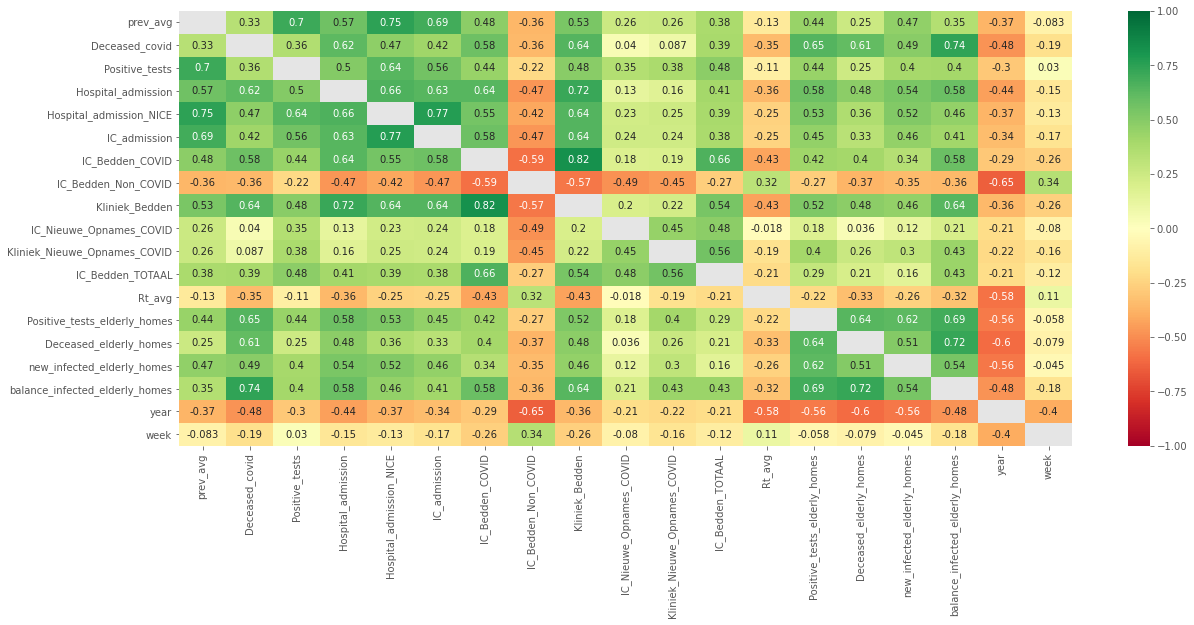

In [6]:
corr_visual(rivm_per_day, 'kendall')

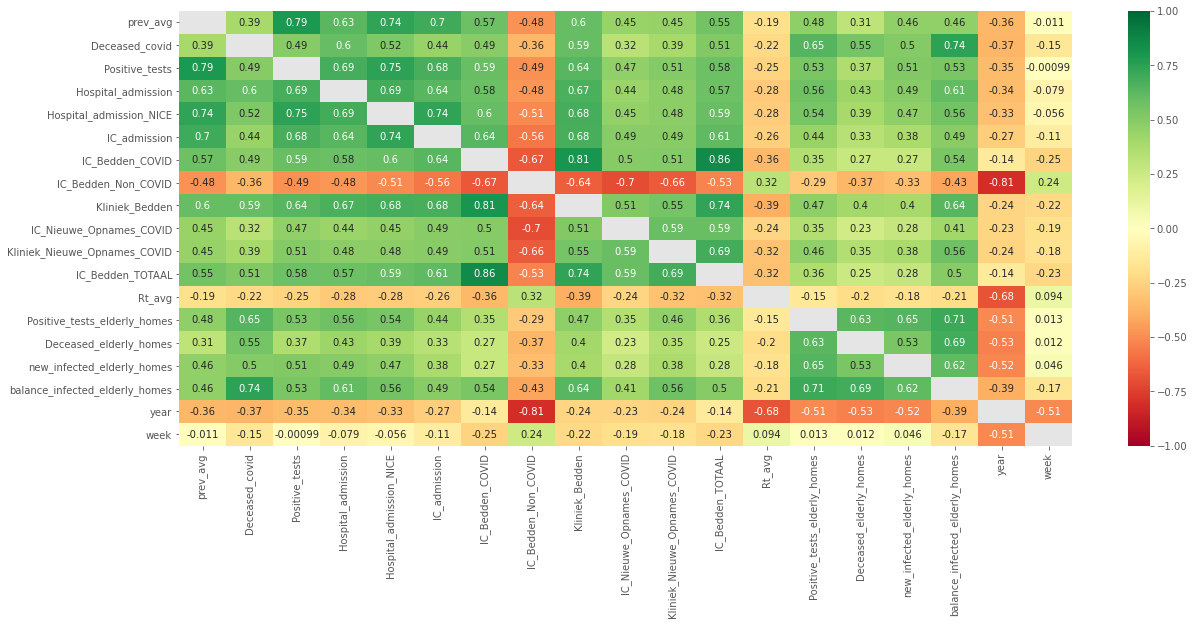

In [7]:
corr_visual(rivm_per_day['2020-06-01':], 'kendall')

## regression

In [8]:
def regress(x_label, y_label, x, y):
    slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    print(line)
    
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x, label=line)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(facecolor='white')
    plt.show()

In [9]:
c = 0
len_c = len(rivm.columns)
for column in rivm.columns:
    cn = 1 + c
    while cn < len_c:
        cc = rivm.columns[c]
        ccn = rivm.columns[cn]
        print(cc + ',' + ccn)
        x = rivm[cc]
        y = rivm[ccn]
        regress(cc, cn, x, y)
        cn+=1
    c+=1

NameError: name 'rivm' is not defined